#  Mouad DAHDOUH 
# Visualisation donnes 
# site: https://www.mubawab.ma

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Charger les données

In [2]:
data = pd.read_excel('MubawabMa_clean.xlsx')
data.head(4)

,Titre,Price,Localisation,Size,Nb_pieces,Nb_chambre,Nb_Salles_bain,Etat,Old
0,Appartement Meublé à Louer Place Mozart Tanger,10000,Mozart à Tanger,125,4.0,2.0,2.0,Nouveau,1-5 ans
1,APPART MEUBLE DE LUXE,4500,Moujahidine à Tanger,65,3.0,2.0,1.0,Nouveau,NaN
2,Appartement meublé à la location longue durée,13000,Malabata à Tanger,124,5.0,2.0,2.0,Bon état,NaN
3,Appartement Meublé à Louer – Place Mozart – Ta...,5000,Mozart à Tanger,80,2.0,2.0,1.0,Bon état,5-10 ans


## Seaborn & Matplotlib


In [3]:
data["Localisation"] = data["Localisation"].str.replace(" ","")
data["Localisation"] = data["Localisation"].str.replace("à"," à ")

#### Diagramme circulaire :

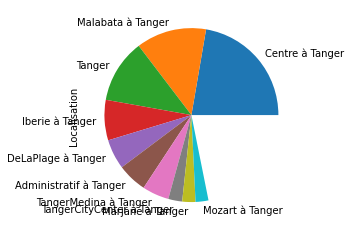

In [4]:
Localisation = data["Localisation"].value_counts(normalize=True).head(10).plot(kind='pie')

#### Matrice de corrélation :

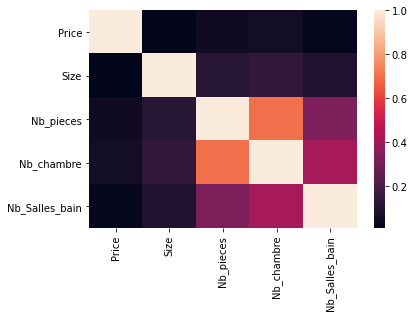

In [5]:
sns.heatmap(data.corr())

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des annonces\n')

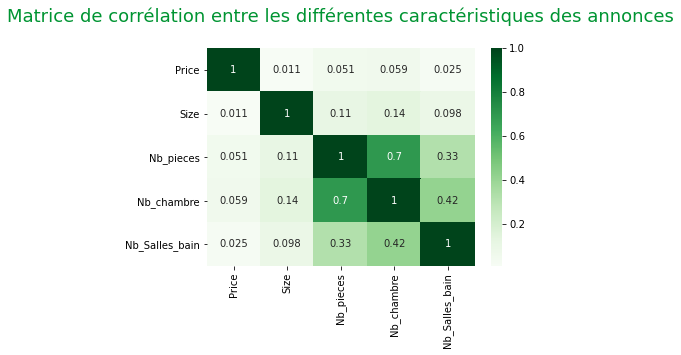

In [6]:
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annonces\n", fontsize=18, color='#009432')


### Histogramme du nombre d’annonces par arrondissement à Tanger :

In [7]:
nbr = data[['Titre','Localisation']].groupby('Localisation').count().sort_values(by='Titre', ascending=False)
nbr.reset_index(0, inplace=True)
nbr.rename(columns={'Titre':'Nb_annonces'}, inplace=True)
nbr.head()


,Localisation,Nb_annonces
0,Centre à Tanger,345
1,Malabata à Tanger,202
2,Tanger,183
3,Iberie à Tanger,116
4,DeLaPlage à Tanger,86


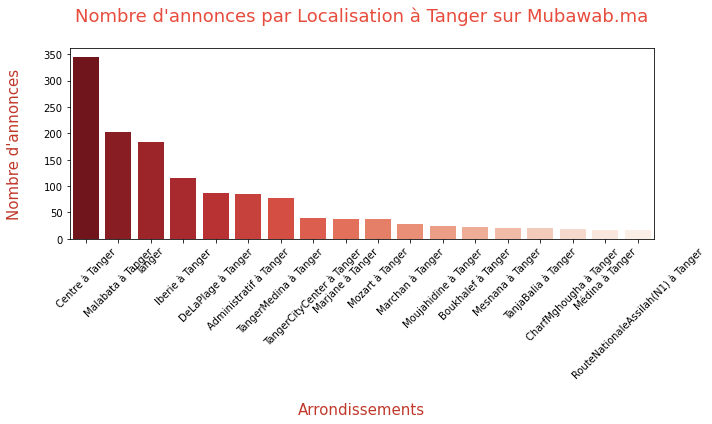

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=nbr['Localisation'].head(18), y=nbr['Nb_annonces'], palette="Reds_r")
plt.xlabel('\nArrondissements', fontsize=15, color='#c0392b')
plt.ylabel("Nombre d'annonces\n", fontsize=15, color='#c0392b')
plt.title("Nombre d'annonces par Localisation à Tanger sur Mubawab.ma\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()


### Histogramme du vente moyen par Localisation  et Prix à Tanger :

In [9]:
Hist = data[['Price','Localisation']].groupby('Localisation').mean().round().sort_values(by='Price', ascending=True)
Hist.reset_index(0, inplace=True)
Hist.head(20)


,Localisation,Price
0,Gourziana à Tanger,120.0
1,Hanaa3-Soussi à Tanger,400.0
2,ElMers1 à Tanger,1300.0
3,ElBaraka à Tanger,1300.0
4,AlWarda à Tanger,1300.0
5,Draoua à Tanger,1500.0
6,BeniSaid à Tanger,1700.0
7,BeniTouzine à Tanger,1700.0
8,Jirrari à Tanger,1764.0
9,LallaChafia à Tanger,1950.0


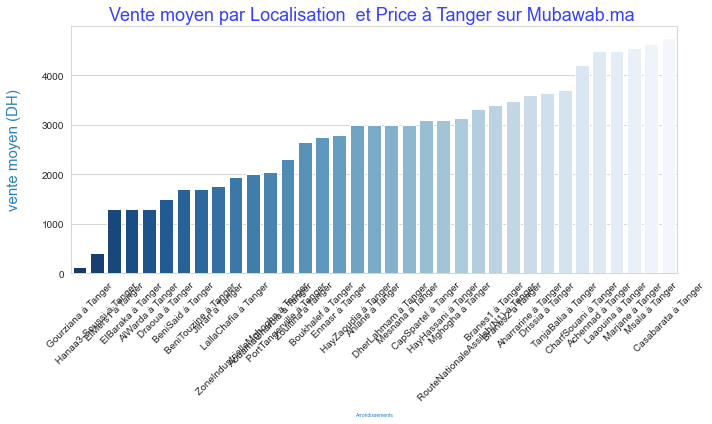

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x=Hist['Localisation'].head(35), y=Hist['Price'], palette="Blues_r")
plt.xlabel('\nArrondissements', fontsize=15, color='#2980b9')
plt.ylabel('vente moyen (DH)\n', fontsize=15, color='#2980b9')
plt.title("Vente moyen par Localisation  et Price à Tanger sur Mubawab.ma ", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()


## Etudie Localisation "Centre à Tanger"

In [54]:
subsetDataFrame = data[data['Localisation'] == 'Centre à Tanger']

In [55]:
indexNames111 =data[ data['Price'] == 2300000].index
subsetDataFrame.drop(indexNames111 , inplace=True)

In [56]:
subsetDataFrame.head(7)


,Titre,Price,Localisation,Size,Nb_pieces,Nb_chambre,Nb_Salles_bain,Etat,Old
7,Appartement HAUT STANDING à louer,6200,Centre à Tanger,125,4.0,3.0,2.0,Nouveau,1-5 ans
9,Appartement deux chambres à louer,4000,Centre à Tanger,95,3.0,2.0,1.0,Nouveau,NaN
10,Appartement deux chambres à louer,4000,Centre à Tanger,100,3.0,2.0,1.0,Bon état,1-5 ans
24,Location appartement 3 ch prés administrations,5500,Centre à Tanger,110,4.0,3.0,2.0,Nouveau,1-5 ans
36,Appartement meublé à la location,6000,Centre à Tanger,115,3.0,2.0,2.0,Bon état,NaN
51,Appartement Neuf Meublé à Louer – Malabata,10000,Centre à Tanger,120,3.0,2.0,2.0,Bon état,5-10 ans
52,Appartement Meublé à Louer – Boulevard Tanger,8500,Centre à Tanger,100,3.0,2.0,2.0,Bon état,10-20 ans


### Visualisation des prix des maisons dans Centre à Tanger

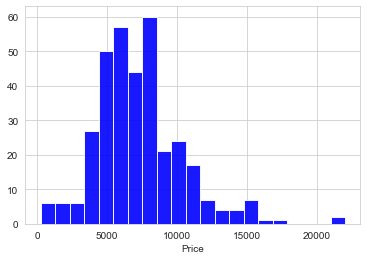

In [57]:
sns.distplot(subsetDataFrame['Price'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

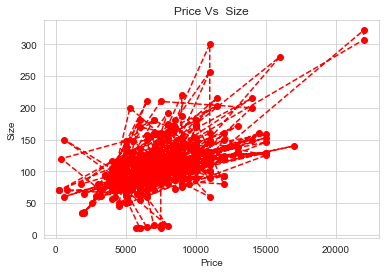

In [58]:
#Price VS Size
sns.set_style("whitegrid")
plt.plot(subsetDataFrame['Price'], subsetDataFrame['Size'],marker='o', linestyle='--', color='r')

plt.xlabel('Price')
plt.ylabel('Size')
plt.title('Price Vs  Size')
plt.show()


### Laissez-nous éparpiller(disperser) quelques variables sur le prix de vente

<Figure size 432x288 with 0 Axes>

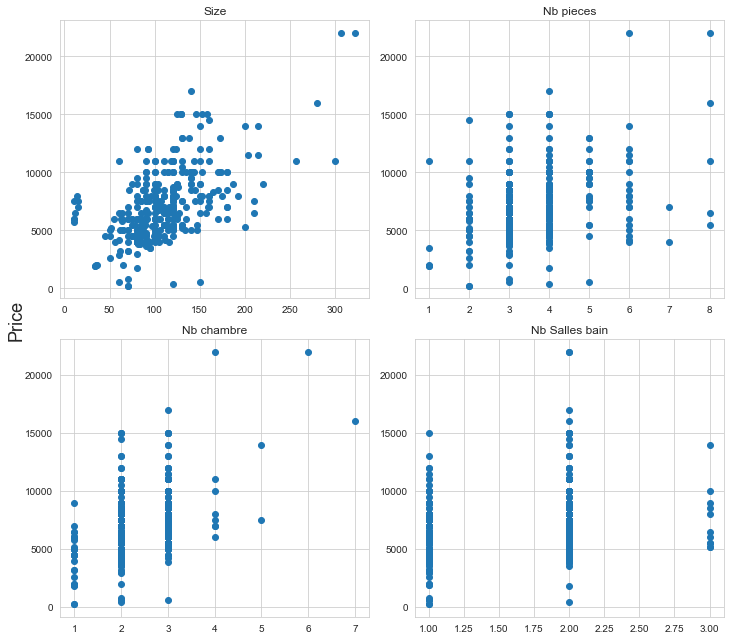

In [59]:
plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(10, 9))
price = subsetDataFrame.Price.values
axarr[0, 0].scatter(subsetDataFrame['Size'].values, price)
axarr[0, 0].set_title('Size')
axarr[0, 1].scatter(subsetDataFrame['Nb_pieces'].values, price)
axarr[0, 1].set_title('Nb pieces')
axarr[1, 0].scatter(subsetDataFrame['Nb_chambre'].values, price)
axarr[1, 0].set_title('Nb chambre')
axarr[1, 1].scatter(subsetDataFrame['Nb_Salles_bain'].values, price)
axarr[1, 1].set_title('Nb Salles bain')
f.text(-0.01, 0.5, 'Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

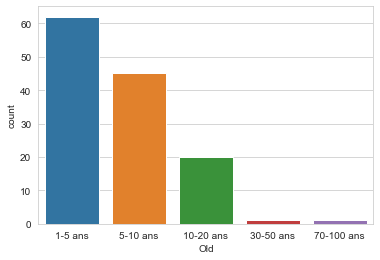

In [60]:
# visualisation de l'âge de la maison
ax = sns.countplot(x="Old", data=subsetDataFrame)

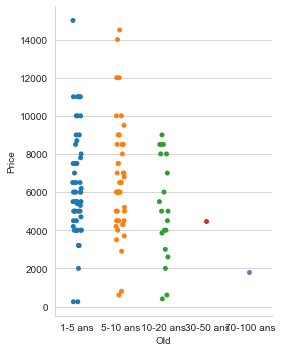

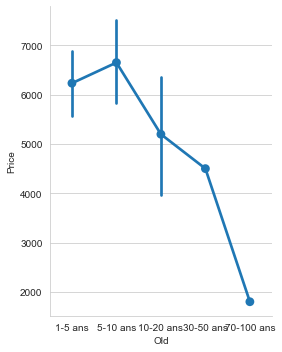

In [61]:
# visualisation de l'âge de la maison par rapport A Prix
import warnings
warnings.filterwarnings("ignore")
sns.catplot(x="Old", y="Price", data=subsetDataFrame,height=5, aspect=.8)
sns.factorplot(x="Old", y="Price", data=subsetDataFrame,height=5, aspect=.8)

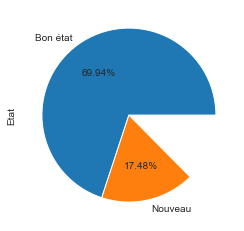

In [62]:
# Visualisation l'etat de la maison
Etat=subsetDataFrame["Etat"].value_counts(normalize=True).head(2).plot(kind='pie',autopct='%1.2f%%')

# Etudie Localisation "Boukhalef à Tanger"

In [63]:
subsetDataFrame_ma = data[data['Localisation'] == 'Boukhalef à Tanger']

In [65]:
subsetDataFrame_ma.head(7)

,Titre,Price,Localisation,Size,Nb_pieces,Nb_chambre,Nb_Salles_bain,Etat,Old
12,Studio meublé à louer uniquement étudiant,1700,Boukhalef à Tanger,17,NaN,NaN,0.0,NaN,NaN
16,Studio meublé pour les étudiants,1200,Boukhalef à Tanger,24,1.0,1.0,1.0,Nouveau,NaN
34,Appartement non meuble en location,3500,Boukhalef à Tanger,85,2.0,2.0,1.0,Bon état,NaN
158,Appartement à louer à Tanger. 2 chambres agréa...,3500,Boukhalef à Tanger,60,2.0,2.0,1.0,Nouveau,NaN
185,Appartement à louer à Tanger. 1 Pièce. Résiden...,1900,Boukhalef à Tanger,60,1.0,1.0,1.0,Bon état,10-20 ans
249,"Location Appartement Meuble Irfane 1, Tanger",2500,Boukhalef à Tanger,60,3.0,2.0,1.0,Nouveau,NaN
251,Appartement a louer doha irfan,3000,Boukhalef à Tanger,60,3.0,3.0,1.0,Nouveau,1-5 ans


### Visualisation des prix des maisons dans "Boukhalef à Tanger"

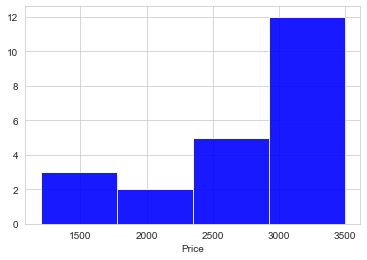

In [66]:
#Visualisation des prix 
sns.distplot(subsetDataFrame_ma['Price'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

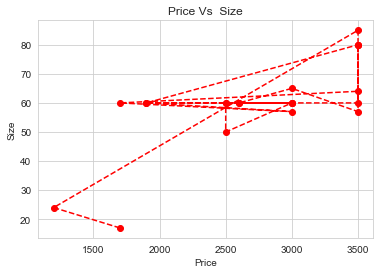

In [67]:
#Price VS Size
sns.set_style("whitegrid")
plt.plot(subsetDataFrame_ma['Price'], subsetDataFrame_ma['Size'],marker='o', linestyle='--', color='r')

plt.xlabel('Price')
plt.ylabel('Size')
plt.title('Price Vs  Size')
plt.show()

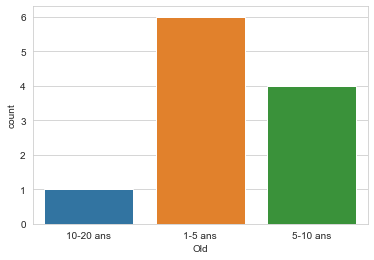

In [68]:
# visualisation de l'âge de la maison
ax = sns.countplot(x="Old", data=subsetDataFrame_ma)

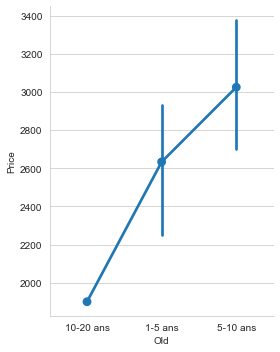

In [69]:
# visualisation de l'âge de la maison par rapport A Prix
import warnings
warnings.filterwarnings("ignore")
sns.factorplot(x="Old", y="Price", data=subsetDataFrame_ma,height=5, aspect=.8)

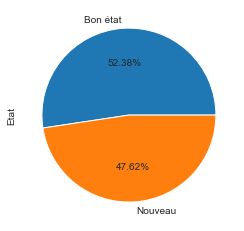

In [70]:
# Visualisation l'etat de la maison
Etat=subsetDataFrame_ma["Etat"].value_counts(normalize=True).head(2).plot(kind='pie',autopct='%1.2f%%')

# Etudie Localisation "Iberie à Tanger"

In [71]:
subsetDataFrame__ma = data[data['Localisation'] == 'Iberie à Tanger']
subsetDataFrame__ma.head(7)

,Titre,Price,Localisation,Size,Nb_pieces,Nb_chambre,Nb_Salles_bain,Etat,Old
11,Appartement deux chambres à louer à iberia,7800,Iberie à Tanger,128,4.0,2.0,2.0,Bon état,5-10 ans
19,Location appartement à IBERIA 5 chambres,9800,Iberie à Tanger,205,7.0,5.0,3.0,Bon état,10-20 ans
20,Location appartement 3ch avec terrasse à Iberia,9000,Iberie à Tanger,180,4.0,3.0,3.0,Bon état,5-10 ans
25,Appartement à louer à Iberia en face consulat,10000,Iberie à Tanger,115,5.0,3.0,2.0,Bon état,NaN
29,Spacieux appartement non meublé,11000,Iberie à Tanger,200,4.0,4.0,2.0,Bon état,NaN
38,Appartement Meublé Vue Mer à Louer– Iberia –Ta...,7000,Iberie à Tanger,150,3.0,2.0,2.0,Bon état,5-10 ans
45,Moderne appartement meuble a louer,12500,Iberie à Tanger,134,3.0,3.0,2.0,Nouveau,NaN


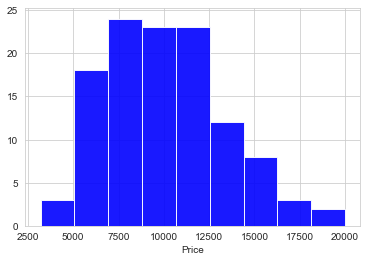

In [72]:
#Visualisation des prix 
sns.distplot(subsetDataFrame__ma['Price'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

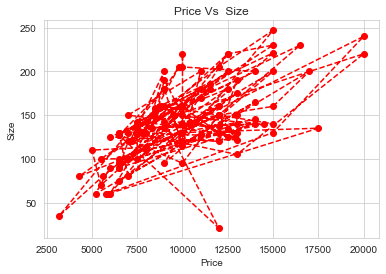

In [73]:
#Price VS Size
sns.set_style("whitegrid")
plt.plot(subsetDataFrame__ma['Price'], subsetDataFrame__ma['Size'],marker='o', linestyle='--', color='r')

plt.xlabel('Price')
plt.ylabel('Size')
plt.title('Price Vs  Size')
plt.show()

<Figure size 432x288 with 0 Axes>

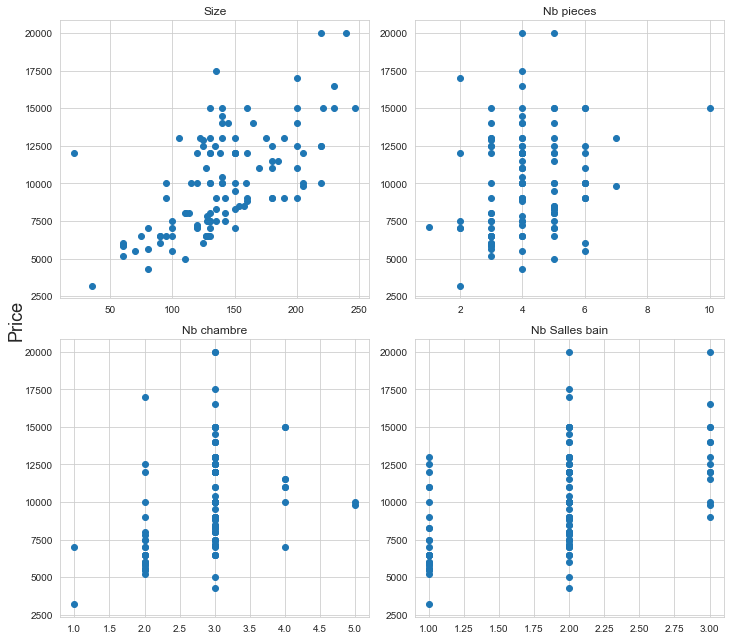

In [74]:
plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(10, 9))
price = subsetDataFrame__ma.Price.values
axarr[0, 0].scatter(subsetDataFrame__ma['Size'].values, price)
axarr[0, 0].set_title('Size')
axarr[0, 1].scatter(subsetDataFrame__ma['Nb_pieces'].values, price)
axarr[0, 1].set_title('Nb pieces')
axarr[1, 0].scatter(subsetDataFrame__ma['Nb_chambre'].values, price)
axarr[1, 0].set_title('Nb chambre')
axarr[1, 1].scatter(subsetDataFrame__ma['Nb_Salles_bain'].values, price)
axarr[1, 1].set_title('Nb Salles bain')
f.text(-0.01, 0.5, 'Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

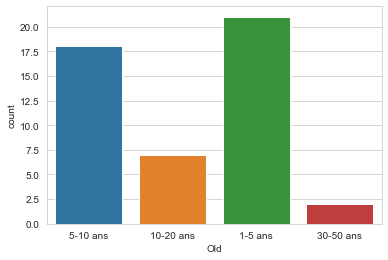

In [75]:
# visualisation de l'âge de la maison
ax = sns.countplot(x="Old", data=subsetDataFrame__ma)

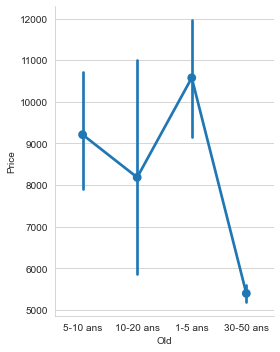

In [76]:
# visualisation de l'âge de la maison par rapport A Prix
import warnings
warnings.filterwarnings("ignore")
sns.factorplot(x="Old", y="Price", data=subsetDataFrame__ma,height=5, aspect=.8)

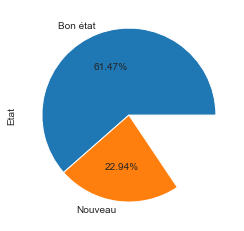

In [77]:
# Visualisation l'etat de la maison
Etat=subsetDataFrame__ma["Etat"].value_counts(normalize=True).head(2).plot(kind='pie',autopct='%1.2f%%')